# Data Mining CS 619, Spring 2018 - Eleonora Renz
### Week 1 - Chapter 1

## Affinity Analysis

#### Loading the dataset with NumPy

In [1]:
import numpy as np

# Load the data
dataset_filename = "affinity_dataset.txt"
x = np.loadtxt("Data/"+dataset_filename)

In [2]:
n_samples, n_features = x.shape # Tuple of array dimensions

In [3]:
# First glimps on the data
print(x[:5])

[[ 0.  1.  0.  0.  0.]
 [ 1.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  1.]
 [ 1.  1.  0.  0.  0.]
 [ 0.  0.  1.  1.  1.]]


In [4]:
# List with feature names
features = ["bread", "milk", "cheese", "apples", "bananas"]

#### Implementing a simple ranking of rules

##### Quick Book Defintions:
<b>Support</b> is the number of times that a rule occurs in a dataset, which is computed by simply counting the
number of samples for which the rule is valid. It can sometimes be normalized by dividing by the total
number of times the premise of the rule is valid, but we will simply count the total for this
implementation.<br>
The <b>premise</b> is the requirements for a rule to be considered active.<br>
The <b>conclusion</b> is the
output of the rule. For the example if a person buys an apple, they also buy a banana, the
rule is only valid if the premise happens - a person buys an apple. The rule's conclusion
then states that the person will buy a banana. <br>
While the support measures how often a rule exists, <b>confidence</b> measures how accurate they are when they
can be used. You can compute this by determining the percentage of times the rule applies when the
premise applies. We first count how many times a rule applies to our data and divide it by the number of
samples where the premise (the if statement) occurs.

In [5]:
from collections import defaultdict

# Create dicts to store results
valid_rules = defaultdict(int)
invalid_rules = defaultdict(int)
num_occurences = defaultdict(int)

# Map the relationship premise to conclusion
for sample in x:
    for premise in range(n_features):
        if sample[premise] == 0: continue
        # Record that the premise was bought in another transaction 
        num_occurences[premise] += 1
        for conclusion in range(n_features):
            if premise == conclusion:
                # It makes little sense to measure if  x -> x.
                continue
            if sample[conclusion] == 1:
                # This person also bought the conclusion item
                valid_rules[(premise, conclusion)] += 1
            

In [6]:
# Calculate support 
support = valid_rules

# Calculate confidence 
confidence = defaultdict(float)
for premise, conclusion in valid_rules.keys():
    rule = (premise, conclusion)
    confidence[rule] = valid_rules[rule] / num_occurences [premise]

In [7]:
# Function for readable rule format
for premise, conclusion in confidence:
    premise_name = features[premise]
    conclusion_name = features[conclusion]
    print("Rule: If a person buys {0} they will also buy {1}".format(premise_name, conclusion_name))
    print(" - Confidence: {0:.3f}".format 
          (confidence[(premise, conclusion)]))
    print(" - Support: {0}".format(support[(premise, conclusion)]))
    print("")

Rule: If a person buys bread they will also buy milk
 - Confidence: 0.464
 - Support: 13

Rule: If a person buys milk they will also buy bread
 - Confidence: 0.250
 - Support: 13

Rule: If a person buys cheese they will also buy bananas
 - Confidence: 0.513
 - Support: 20

Rule: If a person buys bananas they will also buy cheese
 - Confidence: 0.351
 - Support: 20

Rule: If a person buys cheese they will also buy apples
 - Confidence: 0.564
 - Support: 22

Rule: If a person buys apples they will also buy cheese
 - Confidence: 0.512
 - Support: 22

Rule: If a person buys apples they will also buy bananas
 - Confidence: 0.628
 - Support: 27

Rule: If a person buys bananas they will also buy apples
 - Confidence: 0.474
 - Support: 27

Rule: If a person buys milk they will also buy apples
 - Confidence: 0.346
 - Support: 18

Rule: If a person buys apples they will also buy milk
 - Confidence: 0.419
 - Support: 18

Rule: If a person buys milk they will also buy bananas
 - Confidence: 0.519


In [8]:
for premise, conclusion in confidence:
    premise_name = features[premise]
    conclusion_name = features[conclusion]
    print("Rule: If a person buys {0} they will also buy {1}".format(premise_name, conclusion_name))
    print(" - Confidence: {0:.3f}".format
         (confidence[(premise,conclusion)]))
    print(" - Support: {0}".format(support
                                [(premise, conclusion)]))
    print("")

Rule: If a person buys bread they will also buy milk
 - Confidence: 0.464
 - Support: 13

Rule: If a person buys milk they will also buy bread
 - Confidence: 0.250
 - Support: 13

Rule: If a person buys cheese they will also buy bananas
 - Confidence: 0.513
 - Support: 20

Rule: If a person buys bananas they will also buy cheese
 - Confidence: 0.351
 - Support: 20

Rule: If a person buys cheese they will also buy apples
 - Confidence: 0.564
 - Support: 22

Rule: If a person buys apples they will also buy cheese
 - Confidence: 0.512
 - Support: 22

Rule: If a person buys apples they will also buy bananas
 - Confidence: 0.628
 - Support: 27

Rule: If a person buys bananas they will also buy apples
 - Confidence: 0.474
 - Support: 27

Rule: If a person buys milk they will also buy apples
 - Confidence: 0.346
 - Support: 18

Rule: If a person buys apples they will also buy milk
 - Confidence: 0.419
 - Support: 18

Rule: If a person buys milk they will also buy bananas
 - Confidence: 0.519


#### Ranking to find the best rules

In [9]:
from operator import itemgetter

# Sort rules by support
sorted_support = sorted(support.items(), key=itemgetter(1), reverse=True)

In [10]:
# Function based on the result format shown in the book 
#    -> this function is missing in the book, but is used
def print_rule(premise, conclusion, support, confidence, features):
    premise_name = features[premise]
    conclusion_name = features[conclusion]
    print("Rule: If a person buys {0} they will also buy {1}".format(premise_name, conclusion_name))
    print(" - Support: {0}".format(support[(premise, conclusion)]))
    print(" - Confidence: {0:.3f}".format(confidence[(premise, conclusion)]))
    print("")

In [11]:
# Print out top 5 rules based on value/support
sorted_support = sorted(support.items(), key=itemgetter(1), reverse=True)

for index in range(5):
    print("Rule #{0}".format(index + 1))
    premise, conclusion = sorted_support[index][0]
    print_rule(premise, conclusion, support, confidence, features)

Rule #1
Rule: If a person buys apples they will also buy bananas
 - Support: 27
 - Confidence: 0.628

Rule #2
Rule: If a person buys bananas they will also buy apples
 - Support: 27
 - Confidence: 0.474

Rule #3
Rule: If a person buys milk they will also buy bananas
 - Support: 27
 - Confidence: 0.519

Rule #4
Rule: If a person buys bananas they will also buy milk
 - Support: 27
 - Confidence: 0.474

Rule #5
Rule: If a person buys cheese they will also buy apples
 - Support: 22
 - Confidence: 0.564



In [12]:
# Top five rules based on confidence
sorted_confidence = sorted(confidence.items(), key=itemgetter(1), reverse=True)

for index in range(5):
    print("Rule #{0}".format(index + 1))
    premise, conclusion = sorted_confidence[index][0]
    print_rule(premise, conclusion, support, confidence, features)

Rule #1
Rule: If a person buys apples they will also buy bananas
 - Support: 27
 - Confidence: 0.628

Rule #2
Rule: If a person buys bread they will also buy bananas
 - Support: 16
 - Confidence: 0.571

Rule #3
Rule: If a person buys cheese they will also buy apples
 - Support: 22
 - Confidence: 0.564

Rule #4
Rule: If a person buys milk they will also buy bananas
 - Support: 27
 - Confidence: 0.519

Rule #5
Rule: If a person buys cheese they will also buy bananas
 - Support: 20
 - Confidence: 0.513



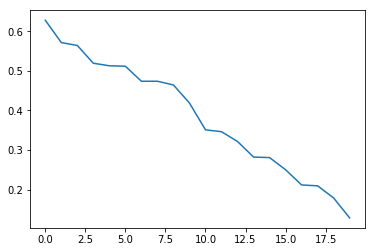

In [13]:
from matplotlib import pyplot as plt
%matplotlib inline

# Plot the confidence
plt.plot([confidence[rule[0]] for rule in sorted_confidence])

## Classification

#### Loading and preparing the dataset

In [14]:
from sklearn.datasets import load_iris
import numpy as np

# Load the data
dataset = load_iris()

# Assign data and target
x = dataset.data
y = dataset.target

n_samples, n_features = x.shape
#print(dataset.DESCR)

##### Quick Book Definitions:

The goal of <b>classification</b> applications is to train a model on a set of samples with known classes and then apply that model to new unseen samples with unknown classes.
<br>
<b>Discretization:</b> Turning a continuous feature into a categorical feature

In [15]:
# Discretizis the attributes by using the mean as a threshold
attribute_means = x.mean(axis=0)

assert attribute_means.shape == (n_features,)
x_d = np.array(x >= attribute_means,dtype='int')

### Implementing the OneR algorithm

##### Quick Book Definitions:
<b>OneR</b> is a simple algorithm that simply predicts the class of a sample by finding the most
frequent class for the feature values. OneR is shorthand for One Rule, indicating we only
use a single rule for this classification by choosing the feature with the best performance.

In [16]:
def train_feature_value(x, y_true, feature, value):
    """ Function to count each time a feature value corresponds to a specific class.
        Returns the most frequent class and error """
    # Create a simple dictionary to count how frequently they give certain predictions
    class_counts = defaultdict(int)
    # Iterate through each sample and count the frequency of each class/value pair
    for sample, y in zip(x, y_true):
        if sample[feature] == value:
            class_counts[y] += 1
            
    # Now get the best one by sorting (highest first) and choosing the first item
    sorted_class_counts = sorted(class_counts.items(), key=itemgetter(1), reverse=True)
    most_frequent_class = sorted_class_counts[0][0]
    # The error is the number of samples that do not classify as the most frequent class
    # and have the frequent value
    n_samples = x.shape[1]
    error = sum([class_count for class_value, class_count in class_counts.items()
                 if class_value != most_frequent_class])
    return most_frequent_class, error

In [17]:
def train(x, y_true, feature):
    """ Function to find the most accurate feature value to use 
        for the specific feature as the OneR """
    # Check that variable is a valid number
    n_samples, n_features = x.shape
    assert 0 <= feature < n_features
    # Get all of the unique values that this variable has 
    values = set(x[:,feature])
    # Stores the predictors array that is returned 
    predictors = dict()
    errors = []
    
    for current_value in values:
        most_frequent_class, error = train_feature_value(x, y_true, feature, current_value)
        predictors[current_value] = most_frequent_class
        errors.append(error)
    # Compute the total error of using this feature to classify on
    total_error = sum(errors)
    return predictors, total_error

#### Testing the algorithm

In [18]:
# Since the sklearn.cross_validation module was deprecated in version 0.18 the model_selection module is used
from sklearn.model_selection import train_test_split

xd_train, xd_test, y_train, y_test = train_test_split(x_d, y, random_state=14)

In [19]:
#from IPython.core.debugger import Tracer; Tracer()()
# Compute the predictors for all the features 
all_predictors = {}
errors = {}
for feature_index in range(xd_train.shape[1]):
    predictors, total_error = train(xd_train, y_train, feature_index)
    all_predictors[feature_index] = predictors
    errors[feature_index] = total_error
    
# Find feature with lowest error -> oneR
best_feature, best_error = sorted(errors.items(), key=itemgetter(1))[0]

# Create model by storing the predictors for the best feature
model = {'feature': best_feature,
        'predictor': all_predictors[best_feature]}

# variable = model['feature']
# predictor = model['predictor']
# prediction = predictor[int(sample[variable])]

In [20]:
def predict(x_test, model):
    """ Function to predict several new samples at one time """
    variable = model['feature']
    predictor = model['predictor']
    y_predicted = np.array([predictor[int(sample[variable])] for sample in x_test])
    return y_predicted

In [21]:
y_predicted = predict(xd_test, model)

accuracy = np.mean(y_predicted == y_test) * 100
print("The test accuracy is {:.1f}%".format(accuracy))

The test accuracy is 65.8%
